# Prédiction des Ruptures de Stock des Distributeurs

# 1 - Chargement des données et vue d'ensemble

In [1]:
import pandas as pd

# Charger le fichier Excel
data_path = 'DEALER.xlsx'
data = pd.read_excel(data_path)

# Afficher les premières lignes pour avoir une vue d'ensemble
print(data.head())

# Afficher un résumé des données
print(data.describe())

# Afficher les types de données de chaque colonne
print(data.dtypes)


     CRYP_num  MT_S12  MT_S11  MT_S10  MT_S9  MT_S8   MT_S7  MT_S6  MT_S5  \
0  59323074.0     0.0     0.0     0.0    0.0    0.0     0.0    0.0  155.0   
1  95388345.0   155.0   170.0    60.0  410.0  110.0   290.0  115.0  350.0   
2  48289392.0    10.0    35.0     0.0    0.0   55.0    70.0   40.0    0.0   
3  47117281.0   260.0   290.0   270.0  360.0  315.0   275.0  260.0   70.0   
4  81214526.0  1175.0  1910.0  1280.0  785.0  890.0  1025.0  545.0  680.0   

   MT_S4  ...  S12_sum  count  CIBLE   pour_ETU     pour_IN  pour_epayment  \
0    0.0  ...      0.0    0.0    0.0   0.000000    0.000000       0.000000   
1  260.0  ...      0.0    0.0    0.0   0.000000  100.000000       0.000000   
2   30.0  ...      0.0    0.0    0.0   0.000000    0.000000       0.000000   
3  100.0  ...      0.0    0.0    0.0   0.000000    0.000000       0.000000   
4  975.0  ...      0.0    2.0    1.0  66.666667   11.111111      22.222222   

        Moy_CA      evo_CA  Moy_Rupt   evo_rupt  
0    14.090909  -1

# 2 - Vérification des valeurs manquantes

In [6]:
# Vérifier les valeurs manquantes
data.isnull().sum()

CRYP_num         14
MT_S12           14
MT_S11           14
MT_S10           14
MT_S9            14
                 ..
pour_epayment     0
Moy_CA            0
evo_CA           14
Moy_Rupt         14
evo_rupt         14
Length: 122, dtype: int64

In [7]:
# remplacer les valeurs manquants par des zero
data.fillna(0, inplace=True)

In [8]:
data.isnull().sum()

CRYP_num         0
MT_S12           0
MT_S11           0
MT_S10           0
MT_S9            0
                ..
pour_epayment    0
Moy_CA           0
evo_CA           0
Moy_Rupt         0
evo_rupt         0
Length: 122, dtype: int64

In [9]:
# Vérifier les types de données
data.dtypes


CRYP_num         float64
MT_S12           float64
MT_S11           float64
MT_S10           float64
MT_S9            float64
                  ...   
pour_epayment    float64
Moy_CA           float64
evo_CA           float64
Moy_Rupt         float64
evo_rupt         float64
Length: 122, dtype: object

# 3 - Statistiques Descriptives :

In [10]:
# Afficher les statistiques descriptives
data.describe()


,CRYP_num,MT_S12,MT_S11,MT_S10,MT_S9,MT_S8,MT_S7,MT_S6,MT_S5,MT_S4,...,S12_sum,count,CIBLE,pour_ETU,pour_IN,pour_epayment,Moy_CA,evo_CA,Moy_Rupt,evo_rupt
count,3.889600e+04,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,...,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000,38896.000000
mean,4.993761e+07,603.239999,631.882533,560.536199,590.721257,705.668835,631.049337,456.449892,648.479098,809.739613,...,0.550828,0.363019,0.017894,40.537853,21.550015,9.780705,637.082869,35.379422,0.579457,-0.034902
std,2.884571e+07,2713.627022,3057.322543,3273.928621,3515.643184,4251.040631,3982.761816,3734.816792,3800.635006,4261.453793,...,3.284080,1.230939,0.132567,42.619118,39.624583,19.466914,3570.538703,906.337626,2.288139,2.367487
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-56103.181818,0.000000,-39.272727
25%,2.491785e+07,70.000000,65.000000,65.000000,70.000000,90.000000,80.000000,35.000000,75.000000,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.000000,-81.818182,0.000000,0.000000
50%,4.989303e+07,285.000000,280.000000,255.000000,280.000000,335.000000,300.000000,180.000000,300.000000,400.000000,...,0.000000,0.000000,0.000000,44.444444,0.000000,0.000000,307.727273,-4.454545,0.000000,0.000000
75%,7.499912e+07,665.000000,695.000000,595.000000,650.000000,775.000000,680.000000,450.000000,705.000000,915.000000,...,0.000000,0.000000,0.000000,100.000000,6.923053,0.000000,683.636364,106.818182,0.000000,0.000000
max,9.999519e+07,247950.000000,295400.000000,335600.000000,351750.000000,436400.000000,413500.000000,446500.000000,425000.000000,437400.000000,...,72.000000,11.000000,1.000000,100.000000,100.000000,100.000000,370027.272727,57595.909091,58.909091,42.090909


# 4 - segmentation : 

In [11]:
# Vérifier si la colonne 'L' existe
if 'MT_S2' in data.columns:
    # Définir les bins et les labels pour la segmentation
    bins = [0, 500, 1000, 1500, 2000, float('inf')]
    labels = ["[0;500]", "]500;1000]", "]1000;1500]", "]1500;2000]", ">2000"]
    
    # Appliquer la segmentation à la colonne 'L' et créer une nouvelle colonne 'segment_S3p'
    data['segment_S3p'] = pd.cut(data['MT_S2'], bins=bins, labels=labels, right=False)
    
    # Afficher les premières lignes pour vérifier
    print(data.head())
    
    # Sauvegarder le DataFrame modifié dans un nouveau fichier Excel (optionnel)
    data.to_excel('DEALER_segmented.xlsx', index=False)
else:
    print("La colonne 'MT_S2' n'existe pas dans le fichier Excel fourni.")


     CRYP_num  MT_S12  MT_S11  MT_S10  MT_S9  MT_S8   MT_S7  MT_S6  MT_S5  \
0  59323074.0     0.0     0.0     0.0    0.0    0.0     0.0    0.0  155.0   
1  95388345.0   155.0   170.0    60.0  410.0  110.0   290.0  115.0  350.0   
2  48289392.0    10.0    35.0     0.0    0.0   55.0    70.0   40.0    0.0   
3  47117281.0   260.0   290.0   270.0  360.0  315.0   275.0  260.0   70.0   
4  81214526.0  1175.0  1910.0  1280.0  785.0  890.0  1025.0  545.0  680.0   

   MT_S4  ...  count  CIBLE   pour_ETU     pour_IN  pour_epayment  \
0    0.0  ...    0.0    0.0   0.000000    0.000000       0.000000   
1  260.0  ...    0.0    0.0   0.000000  100.000000       0.000000   
2   30.0  ...    0.0    0.0   0.000000    0.000000       0.000000   
3  100.0  ...    0.0    0.0   0.000000    0.000000       0.000000   
4  975.0  ...    2.0    1.0  66.666667   11.111111      22.222222   

        Moy_CA      evo_CA  Moy_Rupt   evo_rupt  segment_S3p  
0    14.090909  -14.090909  0.000000   0.000000      [0;500

# 5 - Analyse de la distribution des variables numériques

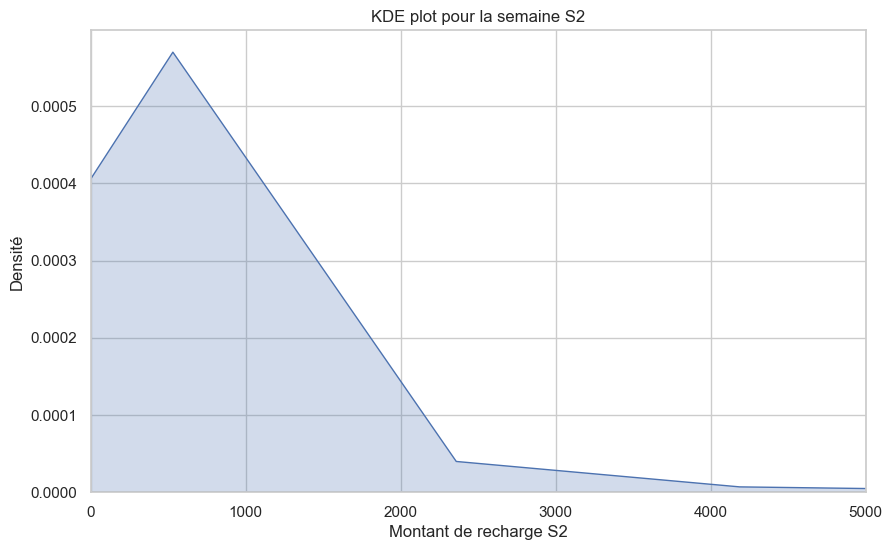

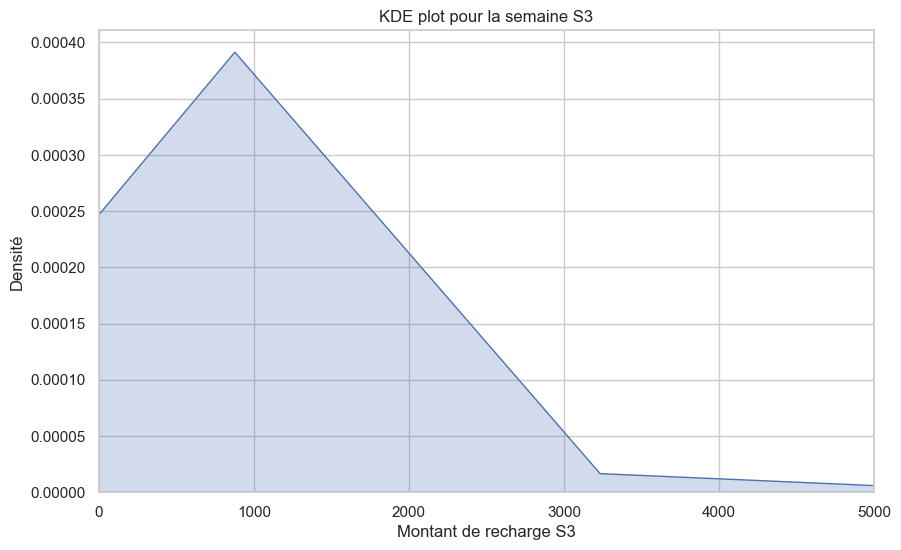

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Paramètres pour améliorer la visualisation
sns.set(style="whitegrid")

# KDE plot pour S2 avec une échelle ajustée pour l'axe x
plt.figure(figsize=(10, 6))
sns.kdeplot(data['MT_S2'], fill=True)
plt.title('KDE plot pour la semaine S2')
plt.xlabel('Montant de recharge S2')
plt.ylabel('Densité')
plt.xlim(0, 5000)  # Limite fixée entre 0 et 2000
plt.show()

# KDE plot pour S3 avec une échelle ajustée pour l'axe x
plt.figure(figsize=(10, 6))
sns.kdeplot(data['MT_S3'], fill=True)
plt.title('KDE plot pour la semaine S3')
plt.xlabel('Montant de recharge S3')
plt.ylabel('Densité')
plt.xlim(0, 5000)  # Limite fixée entre 0 et 2000
plt.show()


# 6 - Boîtes à moustaches pour les variables numériques

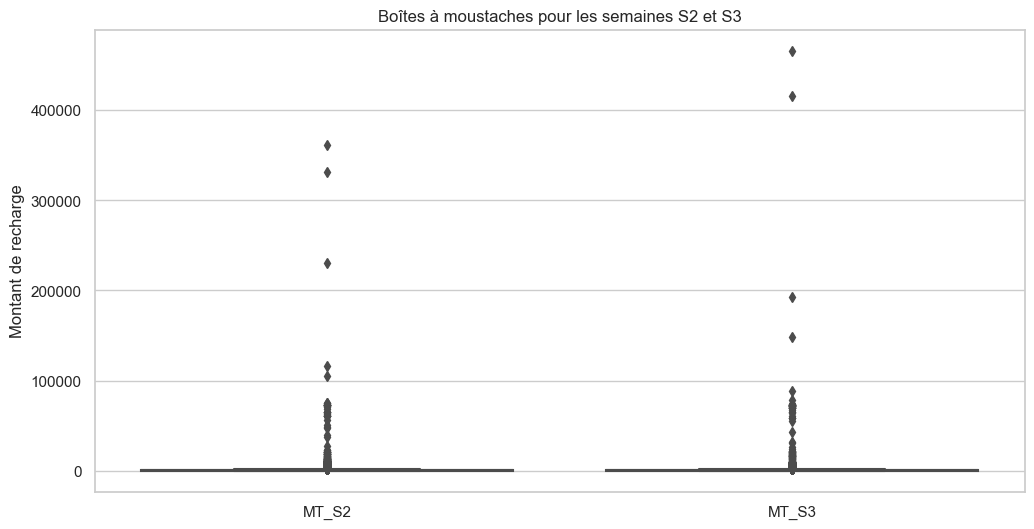

In [13]:
# Boîte à moustaches pour S2 et S3
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['MT_S2', 'MT_S3']])
plt.title('Boîtes à moustaches pour les semaines S2 et S3')
plt.ylabel('Montant de recharge')
plt.show()


# 7 - sans les outliers 

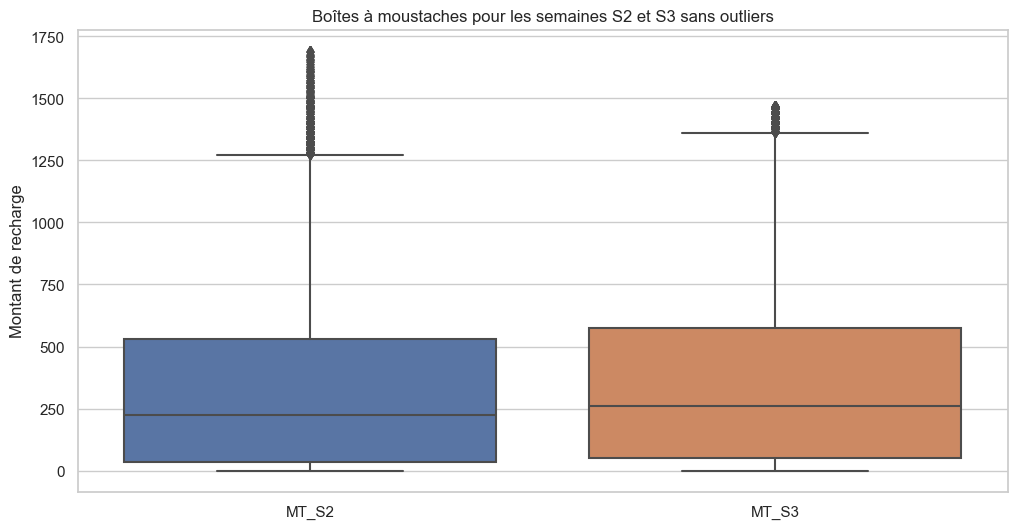

In [14]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Appliquer la fonction pour retirer les outliers pour S2 et S3
data = remove_outliers(data, 'MT_S2')
data = remove_outliers(data, 'MT_S3')

# Visualisation après nettoyage
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['MT_S2', 'MT_S3']])
plt.title('Boîtes à moustaches pour les semaines S2 et S3 sans outliers')
plt.ylabel('Montant de recharge')
plt.show()


# 8 - Corrélation entre S2 et S3

Matrice de corrélation entre S2 et S3:
           MT_S2     MT_S3
MT_S2  1.000000  0.801626
MT_S3  0.801626  1.000000


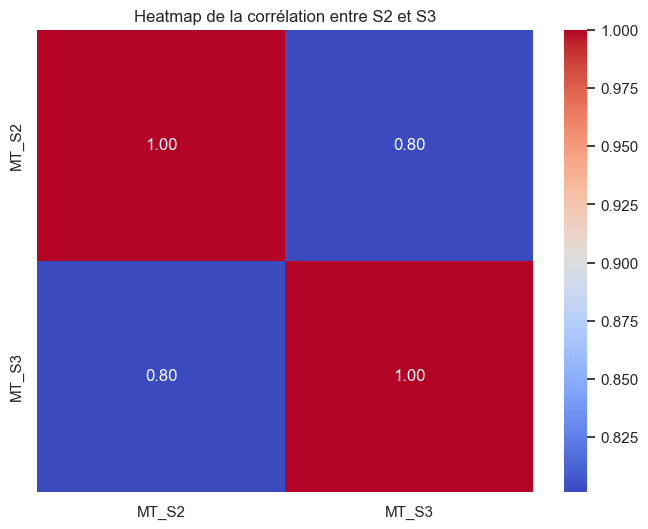

In [15]:
# Calcul de la corrélation entre S2 et S3
correlation = data[['MT_S2', 'MT_S3']].corr()
print("Matrice de corrélation entre S2 et S3:\n", correlation)

# Création d'une heatmap pour visualiser la corrélation entre S2 et S3
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de la corrélation entre S2 et S3')
plt.show()


#  9 - Analyse Bivariée: S2 et S3 VS Variable Cible

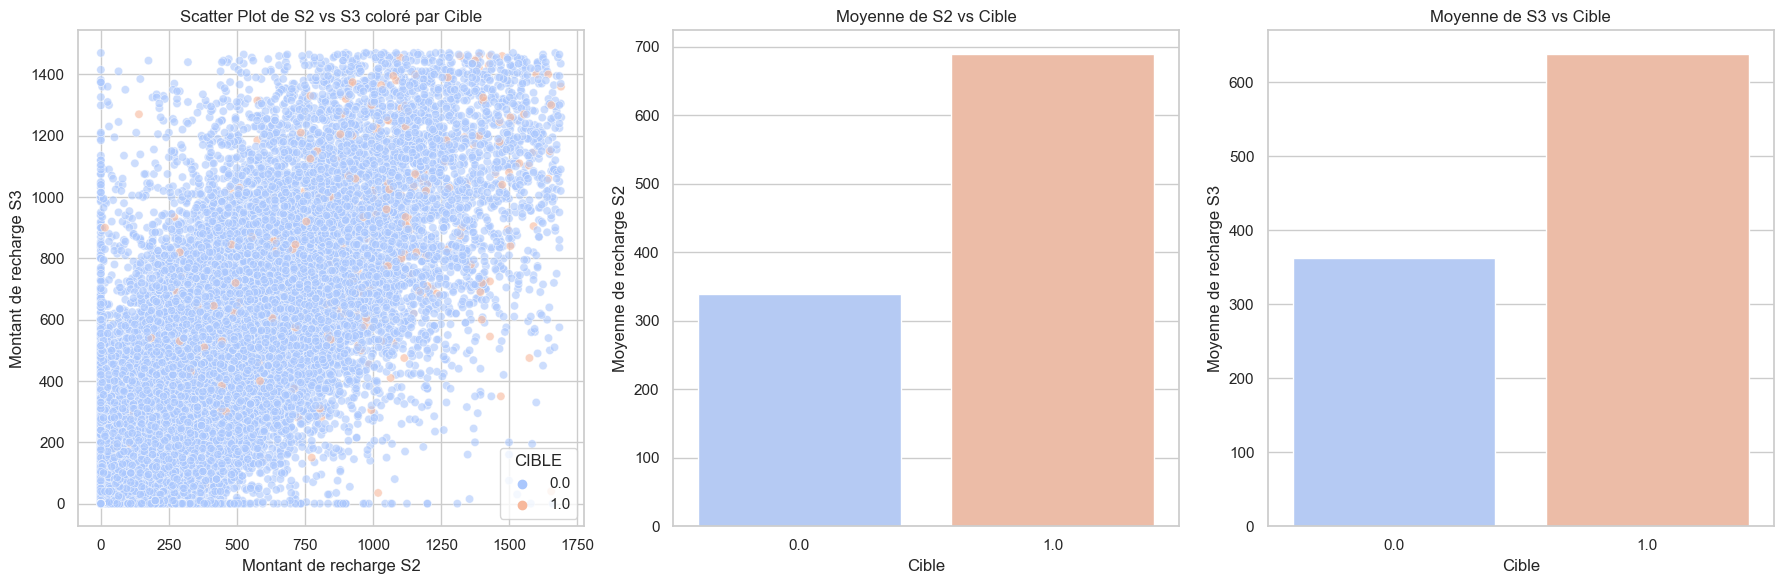

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer la moyenne de S2 et S3 pour chaque valeur de CIBLE
mean_S2_by_cible = data.groupby('CIBLE')['MT_S2'].mean().reset_index()
mean_S3_by_cible = data.groupby('CIBLE')['MT_S3'].mean().reset_index()

# Graphique
plt.figure(figsize=(18, 6))

# Scatter Plot de S2 vs S3 coloré par Cible
plt.subplot(1, 3, 1)
sns.scatterplot(data=data, x='MT_S2', y='MT_S3', hue='CIBLE', palette='coolwarm', alpha=0.6)
plt.title('Scatter Plot de S2 vs S3 coloré par Cible')
plt.xlabel('Montant de recharge S2')
plt.ylabel('Montant de recharge S3')

# Moyenne de S2 vs Cible
plt.subplot(1, 3, 2)
sns.barplot(data=mean_S2_by_cible, x='CIBLE', y='MT_S2', palette='coolwarm')
plt.title('Moyenne de S2 vs Cible')
plt.xlabel('Cible')
plt.ylabel('Moyenne de recharge S2')

# Moyenne de S3 vs Cible
plt.subplot(1, 3, 3)
sns.barplot(data=mean_S3_by_cible, x='CIBLE', y='MT_S3', palette='coolwarm')
plt.title('Moyenne de S3 vs Cible')
plt.xlabel('Cible')
plt.ylabel('Moyenne de recharge S3')

plt.tight_layout()
plt.show()


# 10 -  Pourcentage de ruptures par Segment pour S2 et S3

In [18]:
import pandas as pd
import matplotlib.pyplot as plt



# Correction de la faute de frappe pour la colonne segment_S2 si nécessaire
if 'segemnt_S2' in data.columns:
    data.rename(columns={'segemnt_S2': 'segment_S2'}, inplace=True)

# Calcul des pourcentages pour segment_S2
if 'segment_S2' in data.columns:
    segment_s2_cible1 = data.groupby('segment_S2')['CIBLE'].mean() * 100
    segment_s2_cible1 = segment_s2_cible1.sort_values()  # Tri des segments par ordre croissant des pourcentages

    # Affichage des résultats pour segment_S2
    plt.figure(figsize=(12, 6))
    bars = plt.bar(segment_s2_cible1.index, segment_s2_cible1, color='blue')
    plt.title('Pourcentage de rupture par Segment pour S2')
    plt.xlabel('Segment S2')
    plt.ylabel('Pourcentage de rupture')
    plt.xticks(rotation=45)

    # Ajouter les pourcentages au-dessus des barres avec le symbole '%'
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, f'{round(yval, 2)}%', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Calcul des pourcentages pour segment_S3
if 'segment_S3' in data.columns:
    segment_s3_cible1 = data.groupby('segment_S3')['CIBLE'].mean() * 100
    segment_s3_cible1 = segment_s3_cible1.sort_values()  # Tri des segments par ordre croissant des pourcentages

    # Affichage des résultats pour segment_S3
    plt.figure(figsize=(12, 6))
    bars = plt.bar(segment_s3_cible1.index, segment_s3_cible1, color='green')
    plt.title('Pourcentage de rupture par Segment pour S3')
    plt.xlabel('Segment S3')
    plt.ylabel('Pourcentage de rupture')
    plt.xticks(rotation=45)

    # Ajouter les pourcentages au-dessus des barres avec le symbole '%'
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, f'{round(yval, 2)}%', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()


#  11 - Corrélation des Variables de S2 à S12

Top 10 Corrélations Positives avec la cible:
      Variable  Correlation
0  NB_ETU_S12     0.070954
1  NB_ETU_S11     0.069214
2  NB_ETU_S10     0.066595
3     NBR_S11     0.065615
4     NBL_S11     0.063961
5      MT_S11     0.055712
6     NBR_S10     0.051162
7     NBR_S12     0.051155
8     NBL_S10     0.049952
9     NBL_S12     0.049628

Top 10 Corrélations Négatives avec la cible:
           Variable  Correlation
0       MT_ETU_S11     0.021209
1  NB_epayment_S12     0.020563
2       MT_ETU_S10     0.019918
3  MT_epayment_S11     0.018675
4       MT_ETU_S12     0.016981
5  MT_epayment_S10     0.010435
6  MT_epayment_S12     0.003417
7        MT_IN_S10     0.003304
8        MT_IN_S12     0.002067
9        MT_IN_S11     0.000190


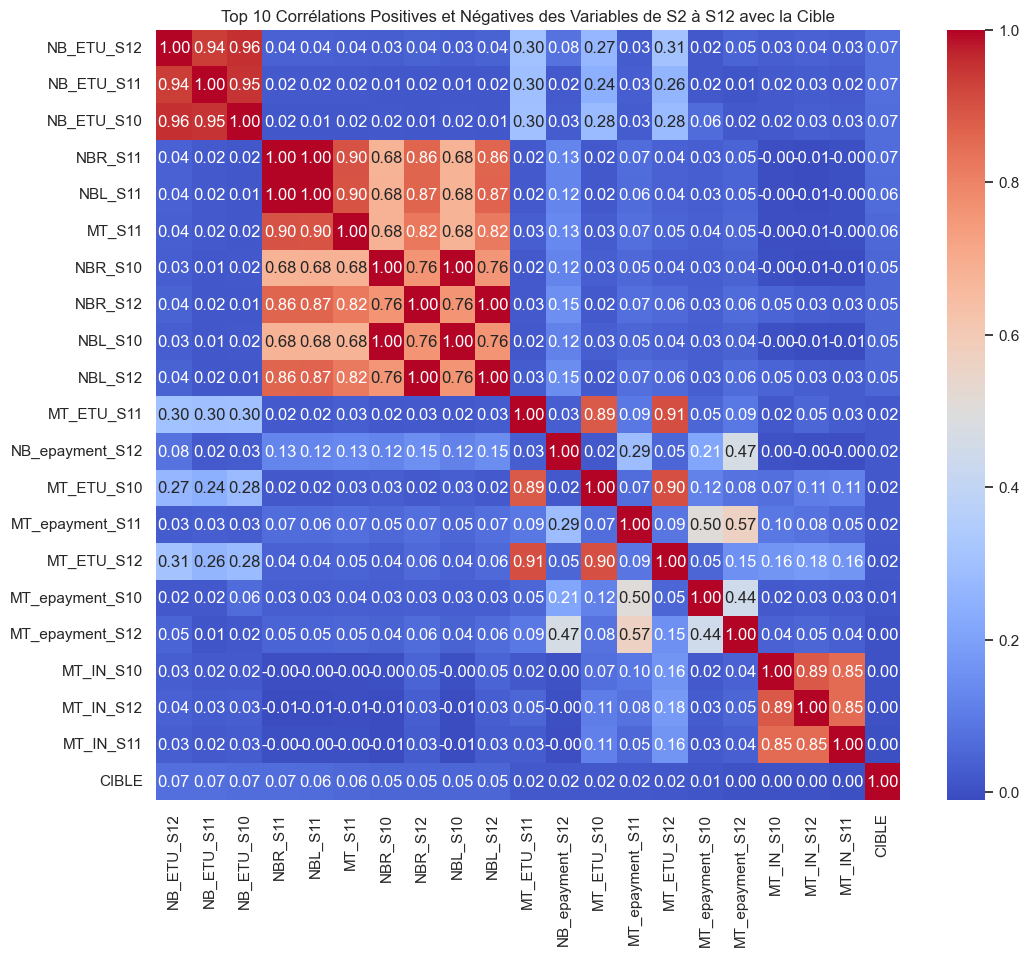

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrer les colonnes correspondant aux semaines S2 à S12
week_columns = [col for col in data.columns if '_S' in col and col[-2:].isdigit() and 2 <= int(col[-2:]) <= 12]

# Ajouter la variable cible
columns_to_analyze = week_columns + ['CIBLE']

# Calcul de la matrice de corrélation
correlation_matrix = data[columns_to_analyze].corr()

# Extraction des corrélations avec la variable cible
corr_with_target = correlation_matrix['CIBLE'].drop('CIBLE').sort_values(ascending=False)

# Sélection des top 10 positivement et négativement corrélées avec la cible
top_10_positive_corr = corr_with_target.head(10)
top_10_negative_corr = corr_with_target.tail(10)

# Convertir les résultats en DataFrame pour affichage
top_10_positive_corr_df = top_10_positive_corr.reset_index()
top_10_positive_corr_df.columns = ['Variable', 'Correlation']

top_10_negative_corr_df = top_10_negative_corr.reset_index()
top_10_negative_corr_df.columns = ['Variable', 'Correlation']

# Affichage combiné des top 10 corrélations positives et négatives
combined_corr_df = pd.concat([top_10_positive_corr_df, top_10_negative_corr_df])

# Afficher les résultats
print("Top 10 Corrélations Positives avec la cible:\n", top_10_positive_corr_df)
print("\nTop 10 Corrélations Négatives avec la cible:\n", top_10_negative_corr_df)

# Créer un masque pour n'afficher que les top 10 positives et négatives dans le heatmap
top_corr_variables = list(top_10_positive_corr_df['Variable']) + list(top_10_negative_corr_df['Variable'])
filtered_corr_matrix = correlation_matrix.loc[top_corr_variables + ['CIBLE'], top_corr_variables + ['CIBLE']]

# Visualisation de la matrice de corrélation filtrée avec heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top 10 Corrélations Positives et Négatives des Variables de S2 à S12 avec la Cible')
plt.show()


# 12 - Identification des Corrélations Positives et Négatives

Top 10 Corrélations Positives avec la cible:
     Variable  Correlation
0     S2_sum     0.407142
1     S3_sum     0.234602
2     NBR_S2     0.115348
3     NBL_S2     0.114517
4      MT_S2     0.099843
5     NBR_S3     0.099014
6     NBL_S3     0.098629
7      MT_S3     0.080120
8  NB_ETU_S3     0.078002
9  NB_ETU_S2     0.075692

Top 10 Corrélations Négatives avec la cible:
          Variable  Correlation
0  NB_epayment_S2     0.037176
1        NB_IN_S2     0.026149
2  NB_epayment_S3     0.025964
3       MT_ETU_S3     0.018863
4       MT_ETU_S2     0.018011
5        NB_IN_S3     0.015585
6  MT_epayment_S2     0.009709
7  MT_epayment_S3     0.004725
8        MT_IN_S2     0.001402
9        MT_IN_S3     0.001131


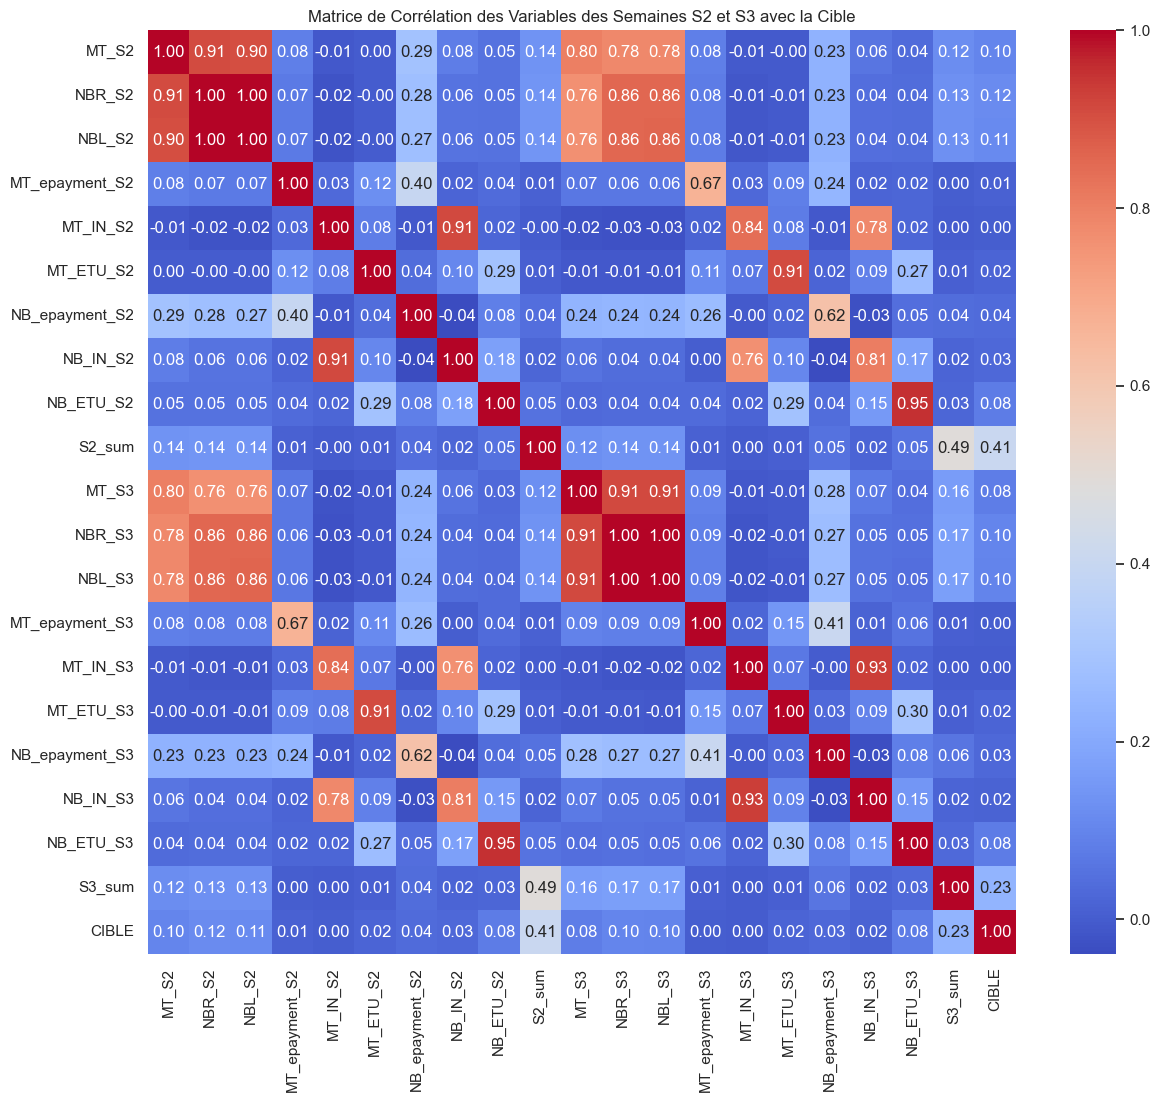

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Sélection des colonnes pour les semaines S2 et S3
variables_S2_S3 = [
    'MT_S2', 'NBR_S2', 'NBL_S2', 'MT_epayment_S2', 'MT_IN_S2', 'MT_ETU_S2',
    'NB_epayment_S2', 'NB_IN_S2', 'NB_ETU_S2', 'S2_sum',
    'MT_S3', 'NBR_S3', 'NBL_S3', 'MT_epayment_S3', 'MT_IN_S3', 'MT_ETU_S3',
    'NB_epayment_S3', 'NB_IN_S3', 'NB_ETU_S3', 'S3_sum',
    'CIBLE'
]

# Extraire les variables d'intérêt
data_subset = data[variables_S2_S3]

# Calcul de la matrice de corrélation
correlation_matrix = data_subset.corr()

# Extraction des corrélations avec la variable cible
corr_with_target = correlation_matrix['CIBLE'].drop('CIBLE').sort_values(ascending=False)

# Sélection des top 10 positivement et négativement corrélées avec la cible
top_10_positive_corr = corr_with_target.head(10)
top_10_negative_corr = corr_with_target.tail(10)

# Convertir les résultats en DataFrame pour affichage
top_10_positive_corr_df = top_10_positive_corr.reset_index()
top_10_positive_corr_df.columns = ['Variable', 'Correlation']

top_10_negative_corr_df = top_10_negative_corr.reset_index()
top_10_negative_corr_df.columns = ['Variable', 'Correlation']

# Affichage combiné des top 10 corrélations positives et négatives
combined_corr_df = pd.concat([top_10_positive_corr_df, top_10_negative_corr_df])

# Afficher les résultats
print("Top 10 Corrélations Positives avec la cible:\n", top_10_positive_corr_df)
print("\nTop 10 Corrélations Négatives avec la cible:\n", top_10_negative_corr_df)

# Visualisation de la matrice de corrélation avec heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation des Variables des Semaines S2 et S3 avec la Cible')
plt.show()


# 13 - correlation entre les variables et la cible 

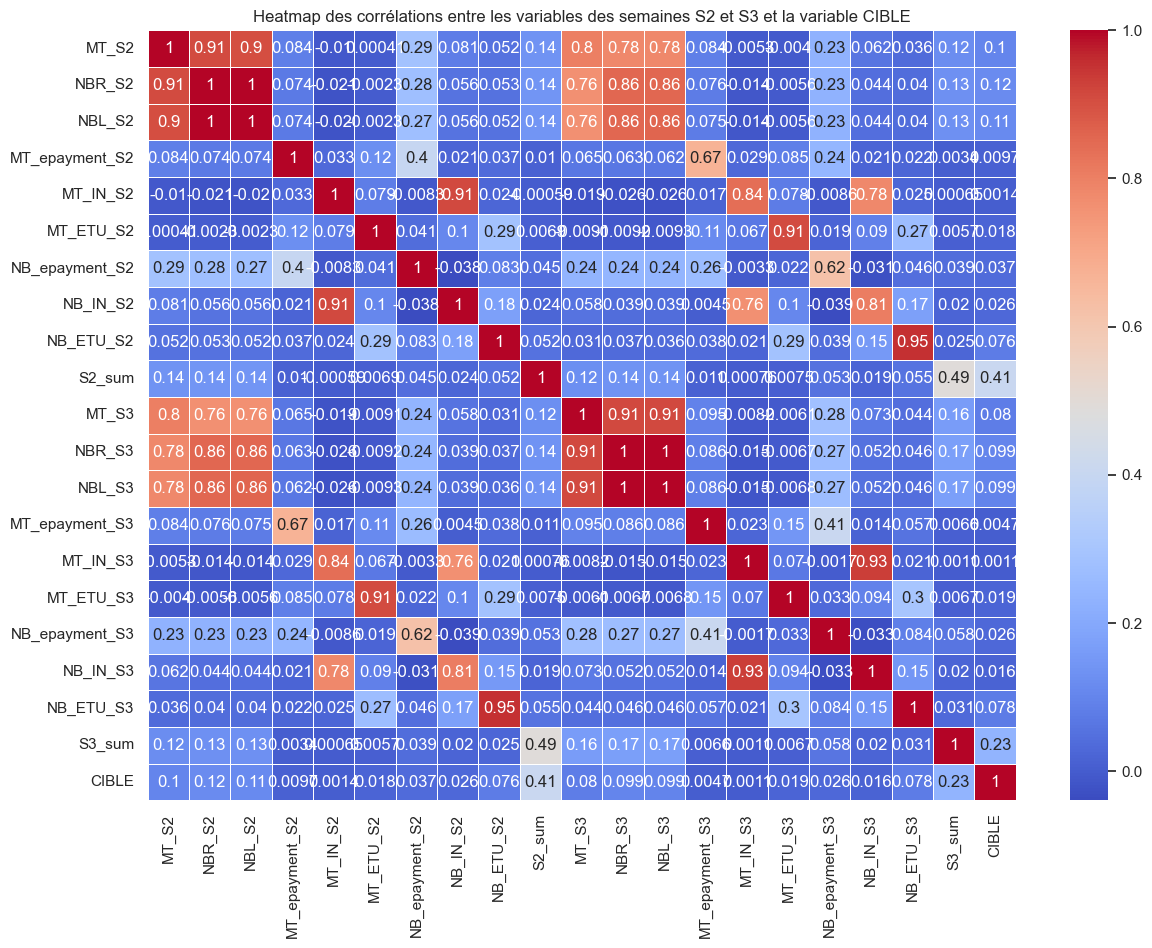

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélection des variables pour S2 et S3
variables_S2_S3 = [
    'MT_S2', 'NBR_S2', 'NBL_S2', 'MT_epayment_S2', 'MT_IN_S2', 'MT_ETU_S2',
    'NB_epayment_S2', 'NB_IN_S2', 'NB_ETU_S2', 'S2_sum',
    'MT_S3', 'NBR_S3', 'NBL_S3', 'MT_epayment_S3', 'MT_IN_S3', 'MT_ETU_S3',
    'NB_epayment_S3', 'NB_IN_S3', 'NB_ETU_S3', 'S3_sum',
    'CIBLE'
]

# Extraire les variables d'intérêt
data_subset = data[variables_S2_S3]

# Calculer la matrice de corrélation
correlation_matrix = data_subset.corr()

# Créer le heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap des corrélations entre les variables des semaines S2 et S3 et la variable CIBLE')
plt.show()


# 14 - calculer le pourcentage des montants de recharge et le nombre de transactions par méthode

In [22]:
# Colonnes pour les méthodes de recharge
methods_columns = ['MT_ETU_S2', 'MT_ETU_S3', 'MT_IN_S2', 'MT_IN_S3', 'MT_epayment_S2', 'MT_epayment_S3']
transaction_columns = ['NB_ETU_S2', 'NB_ETU_S3', 'NB_IN_S2', 'NB_IN_S3', 'NB_epayment_S2', 'NB_epayment_S3']

# Ajouter les montants totaux pour chaque méthode
data['MT_ETU_Total'] = data[['MT_ETU_S2', 'MT_ETU_S3']].sum(axis=1)
data['MT_IN_Total'] = data[['MT_IN_S2', 'MT_IN_S3']].sum(axis=1)
data['MT_epayment_Total'] = data[['MT_epayment_S2', 'MT_epayment_S3']].sum(axis=1)
data['MT_Total'] = data[methods_columns].sum(axis=1)

# Calculer les pourcentages pour chaque méthode
data['Perc_ETU'] = data['MT_ETU_Total'] / data['MT_Total'] * 100
data['Perc_IN'] = data['MT_IN_Total'] / data['MT_Total'] * 100
data['Perc_epayment'] = data['MT_epayment_Total'] / data['MT_Total'] * 100

# Ajouter les nombres totaux de transactions pour chaque méthode
data['NB_ETU_Total'] = data[['NB_ETU_S2', 'NB_ETU_S3']].sum(axis=1)
data['NB_IN_Total'] = data[['NB_IN_S2', 'NB_IN_S3']].sum(axis=1)
data['NB_epayment_Total'] = data[['NB_epayment_S2', 'NB_epayment_S3']].sum(axis=1)
data['NB_Total'] = data[transaction_columns].sum(axis=1)

# Sélectionner les colonnes d'intérêt
result = data[['CRYP_num', 'Perc_ETU', 'Perc_IN', 'Perc_epayment', 'NB_ETU_Total', 'NB_IN_Total', 'NB_epayment_Total']]

# Afficher les résultats
print(result.head())


     CRYP_num   Perc_ETU     Perc_IN  Perc_epayment  NB_ETU_Total  \
0  59323074.0        NaN         NaN            NaN           0.0   
1  95388345.0   0.000000  100.000000       0.000000           0.0   
2  48289392.0        NaN         NaN            NaN           0.0   
3  47117281.0        NaN         NaN            NaN           0.0   
4  81214526.0  66.666667   11.111111      22.222222           5.0   

   NB_IN_Total  NB_epayment_Total  
0          0.0                0.0  
1          5.0                0.0  
2          0.0                0.0  
3          0.0                0.0  
4          1.0                1.0  


# 15 - le pourcentage 

In [23]:
# Colonnes pour les méthodes de recharge
methods_columns = ['MT_ETU_S2', 'MT_ETU_S3', 'MT_IN_S2', 'MT_IN_S3', 'MT_epayment_S2', 'MT_epayment_S3']

# Ajouter les montants totaux pour chaque méthode
data['MT_ETU_Total'] = data[['MT_ETU_S2', 'MT_ETU_S3']].sum(axis=1)
data['MT_IN_Total'] = data[['MT_IN_S2', 'MT_IN_S3']].sum(axis=1)
data['MT_epayment_Total'] = data[['MT_epayment_S2', 'MT_epayment_S3']].sum(axis=1)
data['MT_Total'] = data[methods_columns].sum(axis=1)

# Calculer les pourcentages pour chaque méthode
data['Perc_ETU'] = data['MT_ETU_Total'] / data['MT_Total'] * 100
data['Perc_IN'] = data['MT_IN_Total'] / data['MT_Total'] * 100
data['Perc_epayment'] = data['MT_epayment_Total'] / data['MT_Total'] * 100

# Sélectionner les colonnes d'intérêt
result = data[['CRYP_num', 'Perc_ETU', 'Perc_IN', 'Perc_epayment']]

# Afficher les résultats
print(result.head())

# Sauvegarder les résultats dans un nouveau fichier Excel
result.to_excel('Dealer_Percentages.xlsx', index=False)


     CRYP_num   Perc_ETU     Perc_IN  Perc_epayment
0  59323074.0        NaN         NaN            NaN
1  95388345.0   0.000000  100.000000       0.000000
2  48289392.0        NaN         NaN            NaN
3  47117281.0        NaN         NaN            NaN
4  81214526.0  66.666667   11.111111      22.222222


# 16 - la moyenne CA

In [24]:
# Charger les données du fichier Excel contenant les pourcentages
file_path_percentages = 'Dealer_Percentages.xlsx'
data_percentages = pd.read_excel(file_path_percentages)

# Charger les données du fichier Excel original pour obtenir les montants
file_path_original = 'DEALER.xlsx'
data_original = pd.read_excel(file_path_original)

# Calculer la moyenne du chiffre d'affaires (CA) pour chaque numéro
weeks_columns = ['MT_S2', 'MT_S3', 'MT_S4', 'MT_S5', 'MT_S6', 'MT_S7', 'MT_S8', 'MT_S9', 'MT_S10', 'MT_S11', 'MT_S12']
data_original['CA_Moyenne'] = data_original[weeks_columns].mean(axis=1)

# Joindre les données de pourcentages avec la moyenne du CA
data_combined = pd.merge(data_percentages, data_original[['CRYP_num', 'CA_Moyenne']], on='CRYP_num', how='left')

# Remplacer les valeurs NaN par 0
data_combined.fillna(0, inplace=True)

# Sauvegarder les résultats dans le même fichier Excel
file_path_combined = 'Dealer_Percentages_Updated.xlsx'
data_combined.to_excel(file_path_combined, index=False)

# Afficher les premières lignes pour vérifier
print(data_combined.head())


   CRYP_num   Perc_ETU     Perc_IN  Perc_epayment   CA_Moyenne
0  59323074   0.000000    0.000000       0.000000    14.090909
1  95388345   0.000000  100.000000       0.000000   216.363636
2  48289392   0.000000    0.000000       0.000000    22.272727
3  47117281   0.000000    0.000000       0.000000   236.363636
4  81214526  66.666667   11.111111      22.222222  1024.090909


# 17 - calculer l'evolution

In [26]:
# Calculer la moyenne du chiffre d'affaires (CA) pour chaque numéro
weeks_columns = ['MT_S2', 'MT_S3', 'MT_S4', 'MT_S5', 'MT_S6', 'MT_S7', 'MT_S8', 'MT_S9', 'MT_S10', 'MT_S11', 'MT_S12']
data['Moy_CA'] = data[weeks_columns].mean(axis=1)

# Calculer l'évolution pour chaque numéro
data['evo_CA'] = data['MT_S2'] - data['Moy_CA']

# Remplacer les valeurs NaN par 0
data.fillna(0, inplace=True)

# Sauvegarder les résultats dans un nouveau fichier Excel
file_path_combined = 'Dealer_Percentages_with_Evo_Updated.xlsx'
data.to_excel(file_path_combined, index=False)

# Afficher les premières lignes pour vérifier
data.head()


,CRYP_num,MT_S12,MT_S11,MT_S10,MT_S9,MT_S8,MT_S7,MT_S6,MT_S5,MT_S4,...,MT_IN_Total,MT_epayment_Total,MT_Total,Perc_ETU,Perc_IN,Perc_epayment,NB_ETU_Total,NB_IN_Total,NB_epayment_Total,NB_Total
0,59323074.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,95388345.0,155.0,170.0,60.0,410.0,110.0,290.0,115.0,350.0,260.0,...,25250.0,0.0,25250.0,0.000000,100.000000,0.000000,0.0,5.0,0.0,5.0
2,48289392.0,10.0,35.0,0.0,0.0,55.0,70.0,40.0,0.0,30.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,47117281.0,260.0,290.0,270.0,360.0,315.0,275.0,260.0,70.0,100.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,81214526.0,1175.0,1910.0,1280.0,785.0,890.0,1025.0,545.0,680.0,975.0,...,500.0,1000.0,4500.0,66.666667,11.111111,22.222222,5.0,1.0,1.0,7.0


# 18 - l'evolution des ruptures 

In [27]:
# Colonnes des ruptures par semaine
rupture_columns = ['S1_sum', 'S2_sum', 'S3_sum', 'S4_sum', 'S5_sum', 'S6_sum', 'S7_sum', 'S8_sum', 'S9_sum', 'S10_sum', 'S11_sum', 'S12_sum']

# Calculer la moyenne des ruptures pour chaque numéro (en excluant S1_sum si nécessaire)
data['Moy_Rupture'] = data[['S2_sum', 'S3_sum', 'S4_sum', 'S5_sum', 'S6_sum', 'S7_sum', 'S8_sum', 'S9_sum', 'S10_sum', 'S11_sum', 'S12_sum']].mean(axis=1)

# Calculer l'évolution de la rupture pour chaque numéro (par exemple pour S2)
data['evo_rupture'] = data['S2_sum'] - data['Moy_Rupture']

# Remplacer les valeurs NaN par 0
data.fillna(0, inplace=True)

# Sauvegarder les résultats dans le même fichier Excel
data.to_excel('Dealer_Percentages_Updated.xlsx', index=False)

# Afficher les premières lignes pour vérifier
data.head()


,CRYP_num,MT_S12,MT_S11,MT_S10,MT_S9,MT_S8,MT_S7,MT_S6,MT_S5,MT_S4,...,MT_Total,Perc_ETU,Perc_IN,Perc_epayment,NB_ETU_Total,NB_IN_Total,NB_epayment_Total,NB_Total,Moy_Rupture,evo_rupture
0,59323074.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
1,95388345.0,155.0,170.0,60.0,410.0,110.0,290.0,115.0,350.0,260.0,...,25250.0,0.000000,100.000000,0.000000,0.0,5.0,0.0,5.0,0.000000,0.000000
2,48289392.0,10.0,35.0,0.0,0.0,55.0,70.0,40.0,0.0,30.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
3,47117281.0,260.0,290.0,270.0,360.0,315.0,275.0,260.0,70.0,100.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
4,81214526.0,1175.0,1910.0,1280.0,785.0,890.0,1025.0,545.0,680.0,975.0,...,4500.0,66.666667,11.111111,22.222222,5.0,1.0,1.0,7.0,2.636364,11.363636


# corr


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Sélection des colonnes pour les semaines S2 à S12 et autres variables d'intérêt
variables_S2_S12 = [
    'MT_S12', 'MT_S11', 'MT_S10', 'MT_S9', 'MT_S8', 'MT_S7', 'MT_S6', 'MT_S5', 'MT_S4', 'MT_S3', 'MT_S2',
    'NBR_S12', 'NBR_S11', 'NBR_S10', 'NBR_S9', 'NBR_S8', 'NBR_S7', 'NBR_S6', 'NBR_S5', 'NBR_S4', 'NBR_S3', 'NBR_S2',
    'NBL_S12', 'NBL_S11', 'NBL_S10', 'NBL_S9', 'NBL_S8', 'NBL_S7', 'NBL_S6', 'NBL_S5', 'NBL_S4', 'NBL_S3', 'NBL_S2',
    'MT_epayment_S12', 'MT_epayment_S11', 'MT_epayment_S10', 'MT_epayment_S9', 'MT_epayment_S8', 'MT_epayment_S7', 'MT_epayment_S6', 'MT_epayment_S5', 'MT_epayment_S4', 'MT_epayment_S3', 'MT_epayment_S2',
    'MT_IN_S12', 'MT_IN_S11', 'MT_IN_S10', 'MT_IN_S9', 'MT_IN_S8', 'MT_IN_S7', 'MT_IN_S6', 'MT_IN_S5', 'MT_IN_S4', 'MT_IN_S3', 'MT_IN_S2',
    'MT_ETU_S12', 'MT_ETU_S11', 'MT_ETU_S10', 'MT_ETU_S9', 'MT_ETU_S8', 'MT_ETU_S7', 'MT_ETU_S6', 'MT_ETU_S5', 'MT_ETU_S4', 'MT_ETU_S3', 'MT_ETU_S2',
    'NB_epayment_S12', 'NB_epayment_S11', 'NB_epayment_S10', 'NB_epayment_S9', 'NB_epayment_S8', 'NB_epayment_S7', 'NB_epayment_S6', 'NB_epayment_S5', 'NB_epayment_S4', 'NB_epayment_S3', 'NB_epayment_S2',
    'NB_IN_S12', 'NB_IN_S11', 'NB_IN_S10', 'NB_IN_S9', 'NB_IN_S8', 'NB_IN_S7', 'NB_IN_S6', 'NB_IN_S5', 'NB_IN_S4', 'NB_IN_S3', 'NB_IN_S2',
    'NB_ETU_S12', 'NB_ETU_S11', 'NB_ETU_S10', 'NB_ETU_S9', 'NB_ETU_S8', 'NB_ETU_S7', 'NB_ETU_S6', 'NB_ETU_S5', 'NB_ETU_S4', 'NB_ETU_S3', 'NB_ETU_S2',
    'S1_sum', 'S2_sum', 'S3_sum', 'S4_sum', 'S5_sum', 'S6_sum', 'S7_sum', 'S8_sum', 'S9_sum', 'S10_sum', 'S11_sum', 'S12_sum',
    'count', 'CIBLE', 'pour_ETU', 'pour_IN', 'pour_epayment', 'Moy_CA', 'evo_CA', 'Moy_Rupt', 'evo_rupt'
]

# Extraire les variables d'intérêt
data_subset = data[variables_S2_S12]

# Calcul de la matrice de corrélation
correlation_matrix = data_subset.corr()

# Extraction des corrélations avec la variable cible
corr_with_target = correlation_matrix['CIBLE'].drop('CIBLE').sort_values(ascending=False)

# Sélection des top 10 positivement et négativement corrélées avec la cible
top_10_positive_corr = corr_with_target.head(10)
top_10_negative_corr = corr_with_target.tail(10)

# Convertir les résultats en DataFrame pour affichage
top_10_positive_corr_df = top_10_positive_corr.reset_index()
top_10_positive_corr_df.columns = ['Variable', 'Correlation']

top_10_negative_corr_df = top_10_negative_corr.reset_index()
top_10_negative_corr_df.columns = ['Variable', 'Correlation']

# Affichage combiné des top 10 corrélations positives et négatives
combined_corr_df = pd.concat([top_10_positive_corr_df, top_10_negative_corr_df])

# Afficher les résultats
print("Top 10 Corrélations Positives avec la cible:\n", top_10_positive_corr_df)
print("\nTop 10 Corrélations Négatives avec la cible:\n", top_10_negative_corr_df)



Top 10 Corrélations Positives avec la cible:
    Variable  Correlation
0    S2_sum     0.407142
1  Moy_Rupt     0.330634
2     count     0.318788
3    S3_sum     0.234602
4  evo_rupt     0.233563
5    S4_sum     0.182652
6   S10_sum     0.181579
7    S6_sum     0.180130
8   S11_sum     0.177598
9    S9_sum     0.164729

Top 10 Corrélations Négatives avec la cible:
         Variable  Correlation
0       MT_IN_S7     0.001219
1       MT_IN_S3     0.001131
2       MT_IN_S8     0.000757
3       MT_IN_S4     0.000267
4      MT_IN_S11     0.000190
5       MT_IN_S6    -0.000511
6       MT_IN_S5    -0.001623
7       pour_ETU    -0.003859
8  pour_epayment    -0.007321
9         S1_sum          NaN


# pré-traitement 

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib


# Sélectionner les caractéristiques (features) et la variable cible
X = data.drop(columns=['CIBLE'])
y = data['CIBLE']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Afficher la forme des ensembles d'entraînement et de test
print("Ensemble d'entraînement (X_train):", X_train.shape)
print("Ensemble de test (X_test):", X_test.shape)
print("Cibles d'entraînement (y_train):", y_train.shape)
print("Cibles de test (y_test):", y_test.shape)

# Identifier les colonnes numériques et catégorielles
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns
print()
print()
print("Colonnes numériques:", numeric_features)
print("Colonnes catégorielles:", categorical_features)

# Créer les transformateurs pour les colonnes numériques et catégorielles
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    # Standardise les caractéristiques en supprimant la moyenne et en les mettant 
    # à l'échelle pour avoir une variance unitaire. Cela signifie que chaque caractéristique aura une moyenne de 0 
    # et un écart-type de 1
])


categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    # Convertit les variables catégorielles en une série de colonnes binaires
    # Ignore les catégories inconnues lors de la transformation
])


# Combiner les transformateurs en un préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ], remainder='passthrough')

# Appliquer le préprocesseur aux données d'entraînement et de test
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Afficher la forme des données transformées
print("Données d'entraînement transformées (X_train):", X_train.shape)
print("Données de test transformées (X_test):", X_test.shape)

# Sauvegarder les données pré-traitées et le préprocesseur
joblib.dump((X_train, X_test, y_train, y_test), 'preprocessed_data.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl')  # sauvegarde l'objet préprocesseur (pipeline)

print("Données pré-traitées sauvegardées avec succès.")


# Pourquoi utiliser des pipelines ?
# Les pipelines permettent de chaîner plusieurs étapes de transformation de manière séquentielle.
# Cela rend le code plus propre et plus modulaire, et garantit que les mêmes transformations sont appliquées de manière 
# cohérente pendant l'entraînement et le test.


Ensemble d'entraînement (X_train): (24173, 135)
Ensemble de test (X_test): (10360, 135)
Cibles d'entraînement (y_train): (24173,)
Cibles de test (y_test): (10360,)


Colonnes numériques: Index(['CRYP_num', 'MT_S12', 'MT_S11', 'MT_S10', 'MT_S9', 'MT_S8', 'MT_S7',
       'MT_S6', 'MT_S5', 'MT_S4',
       ...
       'MT_Total', 'Perc_ETU', 'Perc_IN', 'Perc_epayment', 'NB_ETU_Total',
       'NB_IN_Total', 'NB_epayment_Total', 'NB_Total', 'Moy_Rupture',
       'evo_rupture'],
      dtype='object', length=134)
Colonnes catégorielles: Index(['segment_S3p'], dtype='object')
Données d'entraînement transformées (X_train): (24173, 138)
Données de test transformées (X_test): (10360, 138)
Données pré-traitées sauvegardées avec succès.


# training (Random Forest)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Variables importantes identifiées
important_features = [
    'S2_sum', 'Moy_Rupt', 'count', 'S3_sum', 'S5_sum', 'S4_sum', 'S6_sum', 
    'S10_sum', 'S11_sum', 'S7_sum', 'MT_IN_S8', 'MT_IN_S2', 'MT_IN_S11', 
    'MT_IN_S4', 'pour_ETU', 'MT_IN_S6', 'Moy_CA', 'MT_IN_S5', 'pour_epayment'
]

# Garder seulement les colonnes importantes
data = data[important_features + ['CIBLE']]

# Remplacer les valeurs manquantes dans la colonne 'CIBLE' par 0 ( par précaution)
data['CIBLE'] = data['CIBLE'].fillna(0)


# Séparer les variables indépendantes (features) et la variable cible (target)
X = data[important_features]
y = data['CIBLE']


# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entraîner un modèle de forêt aléatoire
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Rapport de classification
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     10228
         1.0       0.50      0.19      0.27       132

    accuracy                           0.99     10360
   macro avg       0.74      0.59      0.63     10360
weighted avg       0.98      0.99      0.98     10360



In [31]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

In [32]:

# Entraîner un modèle XGBoost
xgb_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Prédictions sur le jeu de test
y_pred = xgb_model.predict(X_test)

# Évaluation du modèle


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

C:\infouir\Anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:28:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9885135135135135
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     10228
         1.0       0.64      0.22      0.33       132

    accuracy                           0.99     10360
   macro avg       0.82      0.61      0.66     10360
weighted avg       0.99      0.99      0.99     10360



# LightGBM

In [3]:
pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/d9/28/3be76b591a2e14a031b681b8283acf1dec2ad521f6f1701b7957df68c466/lightgbm-4.5.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.4 MB 2.6 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.4 MB 4.7 MB/s eta 0:00:01
   ------------------------------- -------- 1.1/1.4 MB 8.1 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 9.1 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 7.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [33]:
import lightgbm as lgb


# Entraîner un modèle LightGBM
lgb_model = lgb.LGBMClassifier(objective='binary', random_state=42)
lgb_model.fit(X_train, y_train)

# Prédictions sur le jeu de test
y_pred_lgb = lgb_model.predict(X_test)

# Évaluation du modèle
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
report_lgb = classification_report(y_test, y_pred_lgb)

print(f'LightGBM Accuracy: {accuracy_lgb}')
print(f'LightGBM Classification Report:\n{report_lgb}')


[LightGBM] [Info] Number of positive: 254, number of negative: 23919
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004722 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1238
[LightGBM] [Info] Number of data points in the train set: 24173, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.010508 -> initscore=-4.545094
[LightGBM] [Info] Start training from score -4.545094
LightGBM Accuracy: 0.9882239382239382
LightGBM Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     10228
         1.0       0.60      0.23      0.33       132

    accuracy                           0.99     10360
   macro avg       0.80      0.61      0.66     10360
weighted avg       0.99      0.99      0.99     10360



# sauvegarder le modéle xgboost

In [4]:
import joblib

# Sauvegarder le modèle XGBoost
joblib.dump(xgb_model, 'xgb_model.pkl')

# Sauvegarder les données prétraitées et le préprocesseur
joblib.dump((X_train, X_test, y_train, y_test), 'preprocessed_data.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl')

NameError: name 'xgb_model' is not defined

In [3]:
data['CIBLE'].value_counts()

0.0    38186
1.0      696
Name: CIBLE, dtype: int64